# Speech Recognition Of Digits 

## Importing Libraries

In [3]:
import librosa
import glob
import os
import shutil
import numpy as np
import pickle

## A Function for converting Wav to MFCC

In [4]:
def wav2mfcc(file_path, max_len=8):
    wave, sr = librosa.load(file_path, mono=True, sr=16000)
    amplitude = []
    for i in wave:
        if abs(i)>0.009:
            amplitude.append(i)
    mfcc = librosa.feature.mfcc(np.asarray(amplitude))
    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    
    return mfcc

## Visualising MFCC

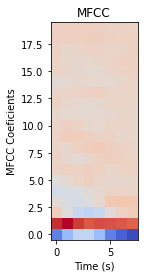

In [5]:
mfccs = wav2mfcc('test/one.wav')
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
fig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfccs, 0 ,1)
cax = ax.imshow(mfccs, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
ax.set_title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coeficients')
plt.show()

## Saving MFCC Data for Furture Use

### The saved data is in pickle file which is availbale in GItHub (Can Skip)

In [6]:
#  SPEECH TO IMAGE ......  (Optional)

# data = []
# label = []
# files_name = ['zero','one','two','three','four','five','six','seven','eight','nine']
# for name in files_name:
#     for i in glob.glob('Digit_data/'+name+'/*'):
#         data.append(wav2mfcc(i))
#         if name=='zero':
#             label.append(0)
#         elif name=='one':
#             label.append(1)
#         elif name=='two':
#             label.append(2)
#         elif name=='three':
#             label.append(3)
#         elif name=='four':
#             label.append(4)
#         elif name=='five':
#             label.append(5)
#         elif name=='six':
#             label.append(6)
#         elif name=='seven':
#             label.append(7)
#         elif name=='eight':
#             label.append(8)
#         elif name=='nine':
#             label.append(9)




In [7]:
#  SPEECH TO IMAGE ......  2 (Data Generation)


# with open("Data_.pkl", "wb") as fp:   #Pickling
#     pickle.dump(data, fp)
with open("Data_.pkl", "rb") as fp:   # Unpickling
    data_ = pickle.load(fp)
# print(np.asarray(data).shape)

In [8]:
#  SPEECH TO IMAGE ......  3 (Data Generation)


# with open("Label.pkl", "wb") as fp:   #Pickling
#     pickle.dump(label, fp)
with open("Label.pkl", "rb") as fp:   # Unpickling
    labels = pickle.load(fp)

## Data Spliting

In [9]:
data1 = np.asarray(data_).reshape(3000,20,8,1)

In [11]:
# Train Test Split 
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y = train_test_split(np.asarray(data1),labels,test_size=0.1)

In [12]:
train_x.shape

(2700, 20, 8, 1)

## Model Preparation

In [14]:
# Model Preparation......

from keras import models
from keras import layers

train_x = train_x.reshape((2700,20*8)).astype('float32')/255
val_x = val_x.reshape((300,20*8)).astype('float32')/255

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(20,8,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10,activation='softmax'))


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 18, 6, 32)         320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 3, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 1, 32)          9248      
_________________________________________________________________
flatten_2 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               28800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [90]:
history = model.fit(train_x,train_y,epochs=50,batch_size=64,validation_data=(val_x,val_y))

Train on 2700 samples, validate on 300 samples
Epoch 1/50
2700/2700 [==============================] - 2s 702us/step - loss: 2.0229 - acc: 0.3626 - val_loss: 1.1814 - val_acc: 0.6233
Epoch 2/50
2700/2700 [==============================] - 1s 293us/step - loss: 1.0207 - acc: 0.6481 - val_loss: 0.7892 - val_acc: 0.7333
Epoch 3/50
2700/2700 [==============================] - 1s 251us/step - loss: 0.7276 - acc: 0.7519 - val_loss: 0.6773 - val_acc: 0.7900
Epoch 4/50
2700/2700 [==============================] - 1s 244us/step - loss: 0.5941 - acc: 0.7881 - val_loss: 0.5767 - val_acc: 0.8067
Epoch 5/50
2700/2700 [==============================] - 1s 234us/step - loss: 0.5056 - acc: 0.8222 - val_loss: 0.5441 - val_acc: 0.8200
Epoch 6/50
2700/2700 [==============================] - 1s 229us/step - loss: 0.4740 - acc: 0.8341 - val_loss: 0.4997 - val_acc: 0.8500
Epoch 7/50
2700/2700 [==============================] - 1s 260us/step - loss: 0.4015 - acc: 0.8615 - val_loss: 0.4934 - val_acc: 0.8500
E

## Saving Model

In [ ]:
model.save('SRD')